In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import scipy.stats as stats
%matplotlib inline
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.activations import relu, softmax
import cv2
import keras.applications.imagenet_utils as imutils
import sklearn



In [27]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/52/2d/ad6928a578c78bb0e44e34a5a922818b14c56716b81d145924f1f291416f/scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.3 MB 5.1 MB/s eta 0:00:02
   --- 

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [10]:
print(df_train.head())
print(df_test.head())

  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0
  image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4


In [11]:
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB
None


In [32]:

directory = 'images/'
img = []

for files in os.listdir(directory):
    if files.startswith('Train'):
        image = cv2.imread(directory+files)
        res = cv2.resize(image, (256,256))
        img.append(res)
    
img = np.array(img)
img.shape

(1821, 256, 256, 3)

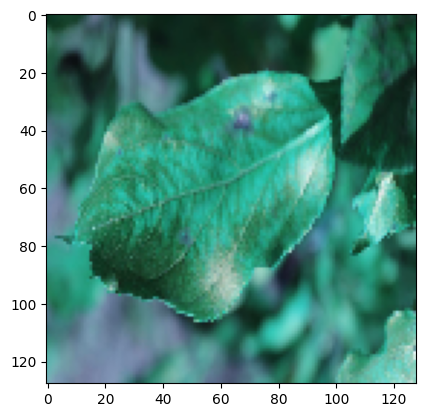

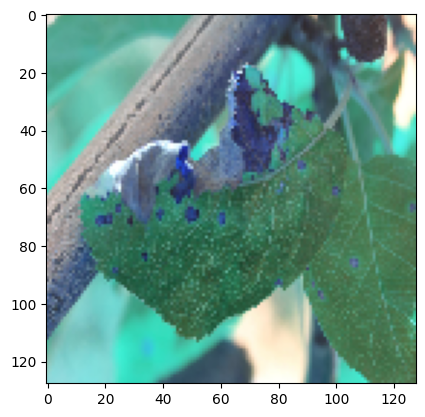

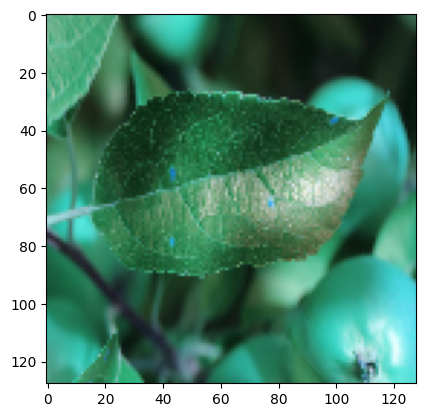

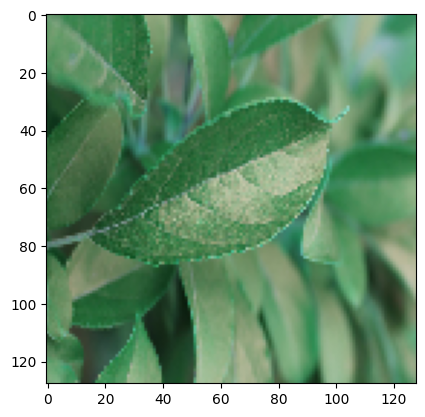

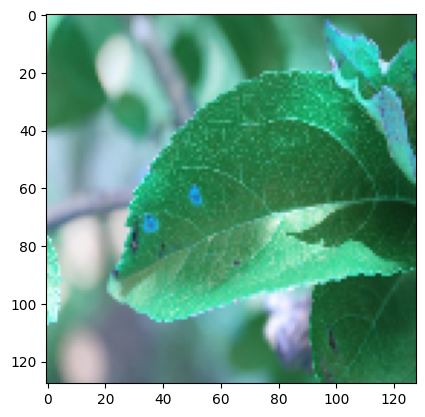

In [6]:
for i in range(0,5):
    plt.imshow(img[i])
    plt.show()

In [31]:
from sklearn.model_selection import train_test_split

train_X, train_Y,



In [34]:
def trainModel():
    imutils.preprocess_input(img)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation=keras.activations.leaky_relu, input_shape=(256,256,3)))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3,3), activation=keras.activations.leaky_relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=(3,3), activation=keras.activations.leaky_relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

model = trainModel()
model.fit(img, df_train['healthy'], epochs=100, validation_split=0.2, batch_size=64)

    


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 62, 62, 64)       